In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/competitions/titanic/train.csv
/kaggle/input/competitions/titanic/test.csv
/kaggle/input/competitions/titanic/gender_submission.csv


In [6]:
df = pd.read_csv('/kaggle/input/competitions/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: title={'center': 'Survived vs Non Survived'}, xlabel='Survived', ylabel='count'>

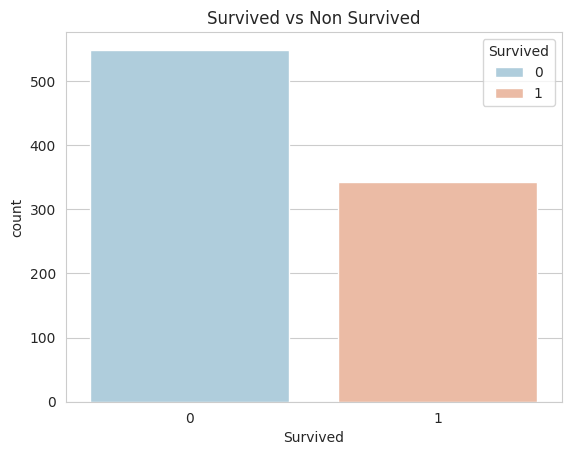

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('Survived vs Non Survived')
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Survived',data=df,palette='RdBu_r')

<Axes: title={'center': 'Survived female vs male'}, xlabel='Survived', ylabel='count'>

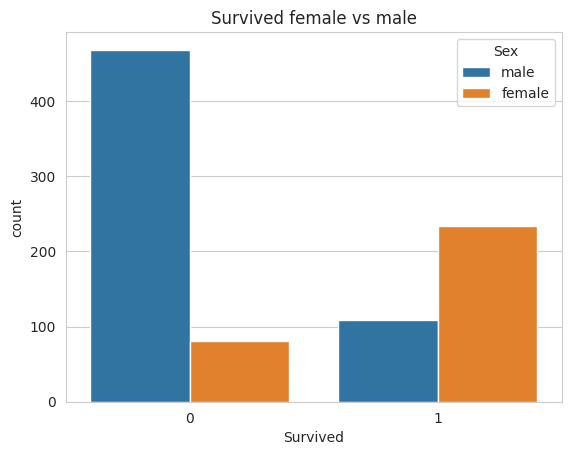

In [12]:
plt.title('Survived female vs male')
sns.countplot(x='Survived',hue='Sex',data=df)

<Axes: title={'center': 'Comparison of Survived in Passenger class'}, xlabel='Survived', ylabel='count'>

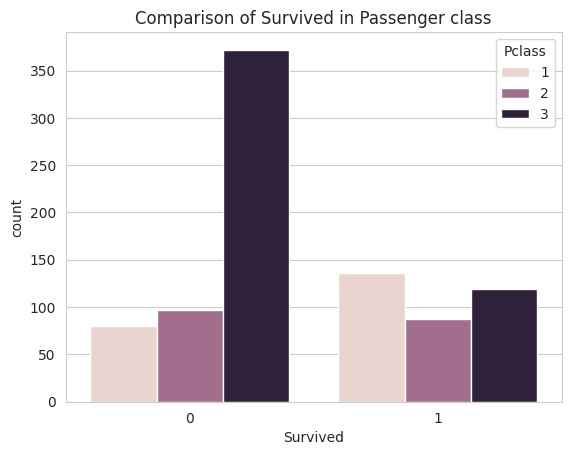

In [13]:
plt.title('Comparison of Survived in Passenger class')
sns.countplot(x='Survived',hue='Pclass',data=df)

/tmp/ipykernel_55/318023848.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].dropna(),kde=True,color='darkred',bins=40)


<Axes: title={'center': 'Distribution of Ages'}, xlabel='Age', ylabel='Density'>

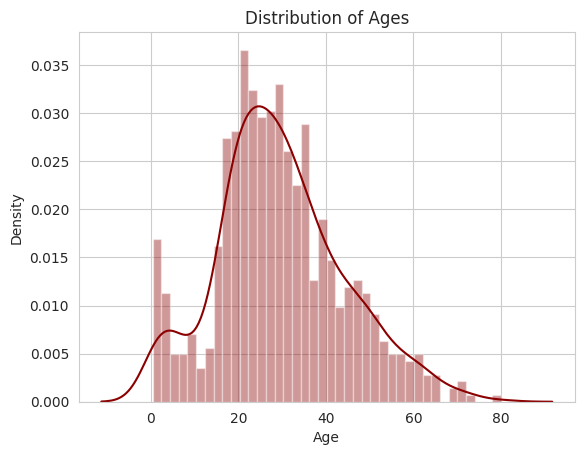

In [16]:
plt.title('Distribution of Ages')
sns.distplot(df['Age'].dropna(),kde=True,color='darkred',bins=40)

<Axes: xlabel='SibSp', ylabel='count'>

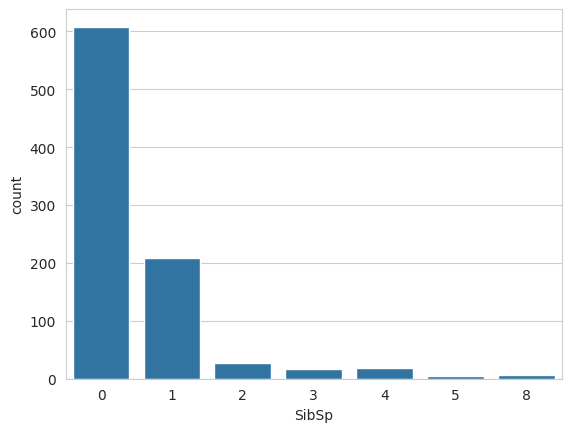

In [17]:
sns.countplot(x='SibSp',data=df)

/tmp/ipykernel_55/1454485090.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'],color='darkred',kde=True)


<Axes: title={'center': 'Distribution of the Fare Price'}, xlabel='Fare', ylabel='Density'>

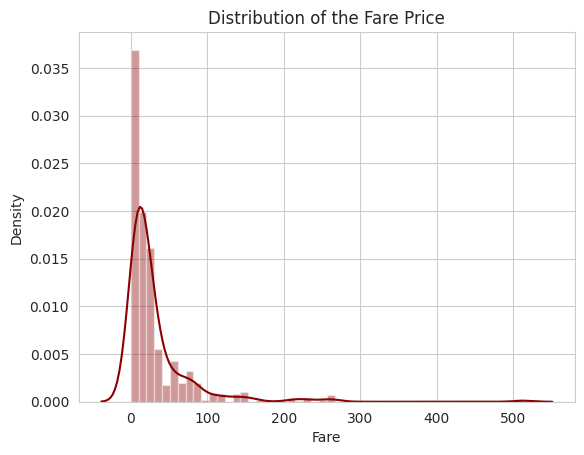

In [18]:
plt.title('Distribution of the Fare Price')
sns.distplot(df['Fare'],color='darkred',kde=True)

In [19]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
daf = df.copy()

In [21]:
daf.drop(['Cabin','Ticket','Name','Embarked'],axis=1,inplace=True)
daf.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [24]:
print(daf['Fare'].skew())


4.787316519674893


In [25]:
daf['Fare_log'] = np.log1p(df['Fare'])  # log(1 + x)


In [26]:
print(daf['Fare_log'].skew())

0.3949280095189306


In [75]:
daf.drop('Fare_log',axis=1,inplace=True)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000
887,888,1,1,female,19.0,0,0,30.0000
888,889,0,3,female,NaN,1,2,23.4500
889,890,1,1,male,26.0,0,0,30.0000


In [22]:
from sklearn.preprocessing import OneHotEncoder

In [40]:
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')


In [32]:
X = daf.iloc[:,2:8]
y  =daf.iloc[:,1]

In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    object 
 2   Age     714 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


In [27]:
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [42]:
ohe.fit(X_train[['Sex']])

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [46]:
sex_train_encoded = ohe.transform(X_train[['Sex']])


In [47]:
sex_test_encoded = ohe.transform(X_test[['Sex']])

In [49]:
columns = ohe.get_feature_names_out(['Sex'])

sex_train_df = pd.DataFrame(sex_train_encoded, columns=columns, index=X_train.index)
sex_test_df = pd.DataFrame(sex_test_encoded, columns=columns, index=X_test.index)

In [50]:
sex_train_df

,Sex_male
331,1.0
733,1.0
382,1.0
704,1.0
813,0.0
...,...
106,0.0
270,1.0
860,1.0
435,0.0


In [51]:
X_train = X_train.drop(columns=['Sex'])
X_test = X_test.drop(columns=['Sex'])

X_train = pd.concat([X_train, sex_train_df], axis=1)
X_test = pd.concat([X_test, sex_test_df], axis=1)

In [52]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_male
331,1,45.5,0,0,28.5000,1.0
733,2,23.0,0,0,13.0000,1.0
382,3,32.0,0,0,7.9250,1.0
704,3,26.0,1,0,7.8542,1.0
813,3,6.0,4,2,31.2750,0.0
...,...,...,...,...,...,...
106,3,21.0,0,0,7.6500,0.0
270,1,NaN,0,0,31.0000,1.0
860,3,41.0,2,0,14.1083,1.0
435,1,14.0,1,2,120.0000,0.0


In [65]:
print(X_train['Age'].skew())

0.3691029285200458


In [61]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='mean')



In [62]:
X_train[['Age']] = imp.fit_transform(X_train[['Age']])
X_test[['Age']] = imp.transform(X_test[['Age']])

In [64]:
print(X_train['ge'].skew())

331    45.500000
733    23.000000
382    32.000000
704    26.000000
813     6.000000
         ...    
106    21.000000
270    29.498846
860    41.000000
435    14.000000
102    21.000000
Name: Age, Length: 712, dtype: float64

In [70]:
X_train['Fare'] = np.log1p(X_train['Fare'])
X_test['Fare'] = np.log1p(X_test['Fare'])

In [71]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_male
331,1,45.500000,0,0,3.384390,1.0
733,2,23.000000,0,0,2.639057,1.0
382,3,32.000000,0,0,2.188856,1.0
704,3,26.000000,1,0,2.180892,1.0
813,3,6.000000,4,2,3.474293,0.0
...,...,...,...,...,...,...
106,3,21.000000,0,0,2.157559,0.0
270,1,29.498846,0,0,3.465736,1.0
860,3,41.000000,2,0,2.715244,1.0
435,1,14.000000,1,2,4.795791,0.0


In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [78]:
model_LR = LogisticRegression()

In [80]:
model_LR.fit(X_train,y_train)

LogisticRegression()

In [82]:
y_pred = model_LR.predict(X_test)

In [84]:
print('accuracy of Logistic Regression model:',accuracy_score(y_pred,y_test))

accuracy of Logistic Regression model: 0.8100558659217877


In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
clf = RandomForestClassifier(n_estimators=200, random_state=42)

In [89]:
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [90]:
y_pred = clf.predict(X_test)

In [91]:
print('accuracy_score of clf model:',accuracy_score(y_pred,y_test))

accuracy_score of clf model: 0.7988826815642458


In [92]:
from sklearn.ensemble import GradientBoostingClassifier

In [93]:
gbc = GradientBoostingClassifier()

In [95]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [97]:
y_pred = gbc.predict(X_test)

In [98]:
print('accuracy_score of gbc model:',accuracy_score(y_pred,y_test))

accuracy_score of gbc model: 0.8044692737430168
